In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

C:\Users\cepyp\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [3]:
df_nm = df.select_dtypes(['int64', 'float64'])
df_nm.dropna(inplace = True)

Split your data into train and test sets.

In [4]:
X = df_nm.drop(columns = ['saleprice', 'id'])
y = df_nm['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X,y)

Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.

In [5]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     132.2
Date:                Thu, 07 Nov 2019   Prob (F-statistic):          8.81e-303
Time:                        19:42:32   Log-Likelihood:                -9924.2
No. Observations:                 840   AIC:                         1.992e+04
Df Residuals:                     805   BIC:                         2.008e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.759e+05   1.79e+06     -0.154      0.878   -3.79e+06    3.24e+06
mssubclass     -142.4884     36.014     -3.956      0.000    -213.181     -71.796
lotfrontage      15.6858     65.508      0.239      0.811    -112.901     144.273
lotarea           0.6145      0.150      4.085      0.000       0.319       0.910
overallqual    1.562e+04   1593.490      9.802      0.000    1.25e+04    1.87e+04
overallcond    6946.9238   1439.108      4.827      0.000    4122.076    9771.771
yearbuilt       284.0066     92.952      3.055      0.002     101.549     466.464
yearremodadd    137.8464     93.371      1.476      0.140     -45.432     321.125
masvnrarea       20.4637      7.278      2.812      0.005       6.177      34.750
bsmtfinsf1       22.8825      3.361      6.809      0.000      16.286      29.479
bsmtfinsf2       -0.0292      5.678     -0.005      0.996     -11.174      11.116
bsmtunfsf        -2.2381      3.060     -0.731      0.465      -8.245       3.769
totalbsmtsf      20.6152      4.596      4.486      0.000      11.594      29.636
firstflrsf       21.7894      8.838      2.465      0.014       4.442      39.137
secondflrsf      25.9670      7.919      3.279      0.001      10.423      41.511
lowqualfinsf    -14.8041     21.368     -0.693      0.489     -56.749      27.140
grlivarea        32.9523      7.917      4.162      0.000      17.412      48.493
bsmtfullbath    231.4222   3441.851      0.067      0.946   -6524.640    6987.484
bsmthalfbath  -4454.7451   5325.837     -0.836      0.403   -1.49e+04    5999.421
fullbath         -3.7146   3764.509     -0.001      0.999   -7393.126    7385.697
halfbath        371.0911   3561.230      0.104      0.917   -6619.301    7361.483
bedroomabvgr  -1.329e+04   2270.249     -5.855      0.000   -1.77e+04   -8836.608
kitchenabvgr  -2.114e+04   7215.963     -2.930      0.003   -3.53e+04   -6979.558
totrmsabvgrd   5489.9226   1558.471      3.523      0.000    2430.775    8549.070
fireplaces     4013.4265   2316.685      1.732      0.084    -534.030    8560.883
garageyrblt      81.0288     96.021      0.844      0.399    -107.452     269.509
garagecars     8054.8197   3653.370      2.205      0.028     883.564    1.52e+04
garagearea       26.7767     12.982      2.063      0.039       1.294      52.260
wooddecksf       18.2831     10.639      1.718      0.086      -2.601      39.167
openporchsf     -23.2883     20.033     -1.163      0.245     -62.611      16.034
enclosedporch     6.2052     22.172      0.280      0.780     -37.317      49.727
threessnporch    17.7528     43.881      0.405      0.686     -68.382     103.887
screenporch      47.1925     20.818      2.267      0.024       6.329      88.056
poolarea         58.0462     28.451      2.040      0.042       2.199     113.894
miscval         -14.9273      7.439     -2.007   

Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.

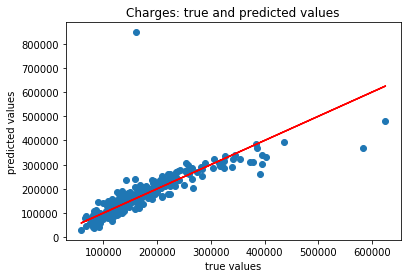

Mean absolute error of the prediction is: 24396.45071319057
Mean squared error of the prediction is: 2657679549.0004478
Root mean squared error of the prediction is: 51552.68711716634
Mean absolute percentage error of the prediction is: 14.957598539536432


In [6]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)


plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Is the performance of your model satisfactory? Why?

- high adjusted r-squared
- low p-value for f-statistic

Try to improve your model in terms of predictive performance by adding or removing some variables.

In [7]:
insig = ['id','saleprice', 'overallcond','lotfrontage', 'yearremodadd', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf','secondflrsf','fireplaces', 'lowqualfinsf', 'bsmthalfbath',
         'fullbath','poolarea', 'screenporch','lotarea','bsmtfullbath','halfbath', 'garageyrblt', 'garagearea', 'openporchsf', 'enclosedporch', 'threessnporch', 'miscval', 'mosold', 'yrsold']
X_1 = df_nm.drop(columns = insig)
y_1 = df_nm['saleprice']

X_1train, X_1test, y_1train, y_1test = train_test_split(X_1, y_1)

X_1 = sm.add_constant(X_1)
op_results = sm.OLS(y_1train, X_1train).fit()
op_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     1954.
Date:                Thu, 07 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:43:11   Log-Likelihood:                -10075.
No. Observations:                 840   AIC:                         2.017e+04
Df Residuals:                     829   BIC:                         2.022e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
mssubclass    -193.0831     34.794     -5.549      0.000    -261.378    -124.788
overallqual   2.356e+04   1518.000     15.522      0.000    2.06e+04    2.65e+04
yearbuilt      -24.4939      5.995     -4.086      0.000     -36.261     -12.727
masvnrarea      27.8983      8.237      3.387      0.001      11.730      44.067
bsmtfinsf1      18.2597      3.241      5.634      0.000      11.898      24.621
grlivarea       42.1979      5.406      7.805      0.000      31.586      52.809
bedroomabvgr -1.024e+04   2516.677     -4.067      0.000   -1.52e+04   -5296.544
kitchenabvgr -3.714e+04   7538.319     -4.927      0.000   -5.19e+04   -2.23e+04
totrmsabvgrd  6026.8174   1790.892      3.365      0.001    2511.600    9542.034
garagecars    2.505e+04   2687.880      9.320      0.000    1.98e+04    3.03e+04
wooddecksf      40.1648     11.972      3.355      0.001      16.667      63.663
==============================================================================
Omnibus:                      347.794   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37696.239
Skew:                          -0.864   Prob(JB):                         0.00
Kurtosis:                      35.773   Cond. No.                     1.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""